I will test out my new tfidf wrapper function with the ingredients. The goal is to get a vector representation of the ingredients. I do this by getting the inverse term frequency of each ingredient. [TODO: add more of an explanation.]

Things to learn more about from the python tfidf class:

- ngram_range: It will look for certain kinds of pairings then?
- max_features: Should I consider this


In [2]:
from tfidf_wrapper import Tfidf_Wrapper
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
recipes = pd.read_csv('../data/20_ingredients.csv')
recipes.head()

,Unnamed: 0,recipe_id,recipe_name,ingredients
0,0,240488,"Pork Loin, Apples, and Sauerkraut",sauerkraut drained^Granny Smith apples sliced^...
1,1,218939,Foolproof Rosemary Chicken Wings,chicken wings^sprigs rosemary^head garlic^oliv...
2,2,87211,Chicken Pesto Paninis,focaccia bread quartered^prepared basil pesto^...
3,3,245714,Potato Bacon Pizza,red potatoes^strips bacon^Sauce:^heavy whippin...
4,4,218545,Latin-Inspired Spicy Cream Chicken Stew,skinless boneless chicken breast halves^diced ...


In [4]:
# Show top 3 ingredients. Each ingredient is separated by the ^ symbol.
[ x.split('^') for x in recipes.ingredients[:3] ]

[['sauerkraut drained',
  'Granny Smith apples sliced',
  'large onion',
  'caraway seeds',
  'apple cider divided',
  'brown sugar',
  'Thai seasoning',
  'salt',
  'garlic powder',
  'ground black pepper',
  'boneless pork loin roast'],
 ['chicken wings',
  'sprigs rosemary',
  'head garlic',
  'olive oil',
  'lemon pepper',
  'seasoned salt'],
 ['focaccia bread quartered',
  'prepared basil pesto',
  'diced cooked chicken',
  'diced green bell pepper',
  'diced red onion',
  'shredded Monterey Jack cheese']]

For the ingredients, I could tokenize it by the ^ symbol that separates the individual ingredients. However, for simplicity, I will combine all the ingredients into one text and tokenize it as if it is a sentence. There are also issues with using each ingredient as a word since sometimes the ingredient includes unnecessary words like 'drained' or 'divided'.

In [5]:
# Change '^' to a space and get out a list of recipe ingredients
ingredients = [ x.replace('^', ' ') for x in recipes.ingredients ]
print(ingredients[:3])

['sauerkraut drained Granny Smith apples sliced large onion caraway seeds apple cider divided brown sugar Thai seasoning salt garlic powder ground black pepper boneless pork loin roast', 'chicken wings sprigs rosemary head garlic olive oil lemon pepper seasoned salt', 'focaccia bread quartered prepared basil pesto diced cooked chicken diced green bell pepper diced red onion shredded Monterey Jack cheese']


In [6]:
# How many recipes here?
len(ingredients)

45630

# Apply Tfidf

In doing this I can see that there might be more data cleaning required. There's some symbols that aren't needed

In [7]:
tfidf = Tfidf_Wrapper()

In [8]:
features = tfidf.fit_transform(ingredients)

In [9]:
# We have 3995 features
features.shape

(45630, 3995)

# Exploring the Output

In [10]:
# Can we see how many docs have each feature?
nfeats_per_doc = features.apply(lambda x: sum(x!=0), axis=1)

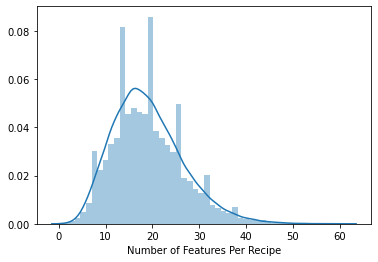

In [11]:
# Most recipes have about 20 or so features (words)
sns.distplot(nfeats_per_doc, axlabel="Number of Features Per Recipe")

In [12]:
ndocs_per_feat = features.apply(lambda x: sum(x!=0), axis=0)

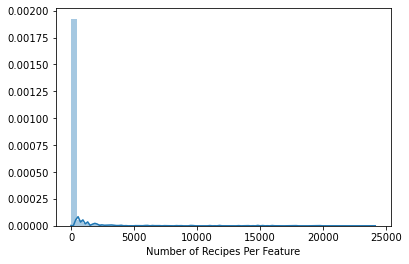

In [13]:
# Most features are specific to a few recipes
sns.distplot(ndocs_per_feat, axlabel="Number of Recipes Per Feature")

In [14]:
# These items were present in over 10,000 recipes
features.columns[ndocs_per_feat>10000]

Index(['black', 'butter', 'cheese', 'chopped', 'egg', 'flour', 'fresh',
       'garlic', 'ground', 'oil', 'onion', 'pepper', 'salt', 'sugar', 'white'],
      dtype='object')

## Outputs of TFIDF

The TFIDF function from sklearn has a few attributes.

In [15]:
# You can look up a word in this dictionary to the index of the feature columns
tfidf.vectorizer.vocabulary_
#features.columns[3085]

{'sauerkraut': 3085,
 'drained': 1088,
 'granny': 1514,
 'smith': 3288,
 'apple': 106,
 'sliced': 3270,
 'large': 1936,
 'onion': 2449,
 'caraway': 540,
 'seed': 3145,
 'cider': 712,
 'divided': 1068,
 'brown': 409,
 'sugar': 3507,
 'thai': 3618,
 'seasoning': 3136,
 'salt': 3059,
 'garlic': 1422,
 'powder': 2754,
 'ground': 1554,
 'black': 285,
 'pepper': 2597,
 'boneless': 332,
 'pork': 2731,
 'loin': 2034,
 'roast': 2972,
 'chicken': 655,
 'wing': 3928,
 'sprig': 3391,
 'rosemary': 3002,
 'head': 1612,
 'olive': 2445,
 'oil': 2442,
 'lemon': 1974,
 'seasoned': 3135,
 'focaccia': 1325,
 'bread': 369,
 'quartered': 2841,
 'prepared': 2768,
 'basil': 213,
 'pesto': 2623,
 'diced': 1037,
 'cooked': 818,
 'green': 1535,
 'bell': 247,
 'red': 2901,
 'shredded': 3221,
 'monterey': 2295,
 'jack': 1755,
 'cheese': 630,
 'potato': 2745,
 'strip': 3477,
 'bacon': 169,
 'sauce': 3084,
 'heavy': 1622,
 'whipping': 3905,
 'cream': 878,
 'butter': 455,
 'minced': 2250,
 'grated': 1524,
 'parmesan'

### Inverse Document Frequency

The program outputs the inverse document frequency for each feature. Higher value means that this term is more unique to particular documents.

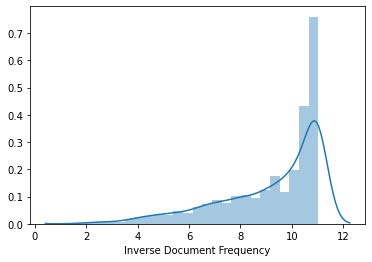

In [16]:
sns.distplot(tfidf.vectorizer.idf_, axlabel="Inverse Document Frequency")

In [17]:
ord = tfidf.vectorizer.idf_.argsort()

# Top 10 terms with highest IDF
print(features.columns[ord[-10:]])

Index(['newfoundland', 'newcastle', 'buttershots', 'nettle', 'nest', 'nescafe',
       'negi', 'neese', 'nik', 'absinthe'],
      dtype='object')


In [18]:
# Bottom 10 terms with highest IDF
print(features.columns[ord[:10]])

Index(['salt', 'pepper', 'ground', 'onion', 'sugar', 'white', 'chopped', 'oil',
       'butter', 'garlic'],
      dtype='object')


# Apply to Test Data

If we get new recipe data, then we can use this model to transform the input recipes to the TFIDF space.

In [19]:
# Here's an example
testX = tfidf.transform(['sliced onions'])
testX.iloc[0,:].to_numpy().nonzero()

(array([2449, 3270]),)

In [20]:
testX = tfidf.transform(['christopher'])
testX.iloc[0,:].to_numpy().nonzero()

(array([], dtype=int64),)

In [21]:
# Can see that it gets the features related to onions and sliced
features.columns[[2449,3270]]

Index(['onion', 'sliced'], dtype='object')

In [22]:
testX.shape

(1, 3995)

# Preview: Proximity Model

In [23]:
terms = ['chicken', 'steak', 'apple', 'orange', 'lettuce', 'pepper', 'tomato', 'brownie', 'cookie']
term_inds = [ tfidf.vectorizer.vocabulary_[item] for item in terms ]
term_inds

[655, 3427, 106, 2453, 1981, 2597, 3670, 412, 820]

In [24]:
term_mat = features.iloc[:,term_inds]
term_mat

,chicken,steak,apple,orange,lettuce,pepper,tomato,brownie,cookie
0,0.000000,0.0,0.359498,0.000000,0.0,0.079930,0.000000,0.0,0.0
1,0.211491,0.0,0.000000,0.000000,0.0,0.137675,0.000000,0.0,0.0
2,0.134020,0.0,0.000000,0.000000,0.0,0.087244,0.000000,0.0,0.0
3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,0.121223,0.0,0.000000,0.000000,0.0,0.078913,0.124444,0.0,0.0
...,...,...,...,...,...,...,...,...,...
45625,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
45626,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
45627,0.000000,0.0,0.000000,0.280215,0.0,0.000000,0.000000,0.0,0.0
45628,0.000000,0.0,0.000000,0.000000,0.0,0.069887,0.000000,0.0,0.0


In [25]:
term_mat.corr().round(2)

,chicken,steak,apple,orange,lettuce,pepper,tomato,brownie,cookie
chicken,1.00,-0.04,-0.04,-0.03,-0.00,0.14,0.01,-0.01,-0.02
steak,-0.04,1.00,-0.02,-0.01,0.01,0.05,0.00,-0.00,-0.01
apple,-0.04,-0.02,1.00,0.01,-0.01,-0.07,-0.06,-0.00,-0.00
orange,-0.03,-0.01,0.01,1.00,-0.00,-0.08,-0.06,-0.01,-0.00
lettuce,-0.00,0.01,-0.01,-0.00,1.00,0.00,0.08,-0.00,-0.01
pepper,0.14,0.05,-0.07,-0.08,0.00,1.00,0.24,-0.03,-0.03
tomato,0.01,0.00,-0.06,-0.06,0.08,0.24,1.00,-0.01,-0.02
brownie,-0.01,-0.00,-0.00,-0.01,-0.00,-0.03,-0.01,1.00,0.01
cookie,-0.02,-0.01,-0.00,-0.00,-0.01,-0.03,-0.02,0.01,1.00


I guess I was expecting something different here where this would group things like chicken and steak. But this is more about when items co-occur and chicken and steak are likely not in the same document. It does appear that chicken and peppers are related. 

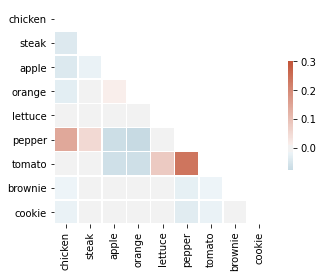

In [26]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(term_mat.corr())

sns.heatmap(term_mat.corr(), mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
# We don't need the whole dataset here since we gave it single words
# Notice that all these words are present in this dataset
testX2 = testX.loc[:,(testX.apply(lambda x: sum(x!=0), axis=0)!=0)]
testX2

""
0


In [28]:
# Why are each of these terms only associated with 1?
testX2.apply(lambda x: sum(x!=0), axis=0)

Series([], dtype: float64)

In [29]:
testX.iloc[0,:].sum()

0.0

# Test Recipes

In [30]:
# First 3 are desserts and other 3 are meat dinner dishes
test_recipes = [
  'caramels water chopped pecans Rice Krispies milk chocolate chips shortening', 
 'peanut butter sugar large egg room temperature vanilla extract milk chocolate kisses', 
 'semisweet chocolate chips, water, large egg yolk lightly beaten, teaspoons vanilla extract, heavy whipping cream, sugar, Whipped cream, raspberries', 
 'dried minced onion, salt, chili powder, cornstarch, ground cumin, red pepper flakes, cayenne pepper, dried minced garlic, dried oregano, ground beef, water',
 'reduced-sodium soy sauce, rice wine vinegar, cornstarch, sesame oil, divided, pork tenderloin, cut into strips, red chile pepper, chopped, cloves garlic, minced, onion, chopped, green bell pepper, chopped, head bok choy, leaves and stalks separated, chopped, crowns broccoli, chopped, ground ginger', 
 'Ingredient Checklist, hoisin sauce, brown sugar, soy sauce, applesauce, pork loin, sliced, cut into thin strips, cornstarch, peanut oil, sesame oil, chopped fresh ginger root, broccoli florets'
]

In [31]:
Xtest = tfidf.transform(test_recipes)

In [32]:
Xtest2 = Xtest.loc[:,(Xtest.apply(lambda x: sum(x!=0), axis=0)!=0)]
Xtest2

,applesauce,beaten,beef,bell,bok,broccoli,brown,butter,caramel,cayenne,...,temperature,tenderloin,thin,vanilla,vinegar,water,whipped,whipping,wine,yolk
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.427873,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.174039,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.14807,0.000000,0.000000,...,0.405687,0.000000,0.000000,0.199291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.211364,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.144568,0.000000,0.126221,0.242606,0.244283,0.000000,0.244913
3,0.000000,0.000000,0.195629,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.231429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.144262,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.120272,0.244449,0.171259,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.205456,0.000000,0.000000,0.117202,0.000000,0.000000,0.000000,0.129957,0.000000
5,0.243784,0.000000,0.000000,0.000000,0.000000,0.213835,0.132471,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.248553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
Xtest2.transpose().corr().round(2)

,0,1,2,3,4,5
0,1.00,-0.02,-0.01,-0.13,-0.14,-0.18
1,-0.02,1.00,0.03,-0.17,-0.28,-0.13
2,-0.01,0.03,1.00,-0.20,-0.36,-0.27
3,-0.13,-0.17,-0.20,1.00,-0.12,-0.20
4,-0.14,-0.28,-0.36,-0.12,1.00,0.01
5,-0.18,-0.13,-0.27,-0.20,0.01,1.00


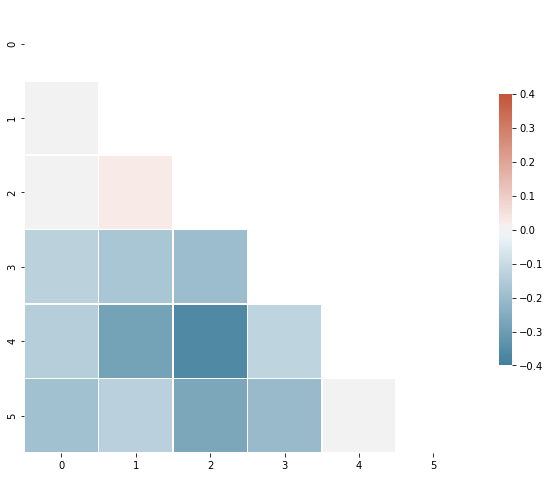

In [35]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Show lower half
mask = np.triu(Xtest2.transpose().corr())

# Size it
plt.figure(figsize=(10,10))

# Plot
sns.heatmap(Xtest2.transpose().corr(), mask=mask, cmap=cmap, vmax=0.4, vmin=-0.4, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})